In [1]:
import sys
sys.path.append('../')

In [2]:
### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as DP
from pipelines.experimental_modeling_pipeline import AsthmaPreprocessing as AP
from pipelines.experimental_modeling_pipeline import ClusteringAnalysis as QA
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

dp = DP("C:/Users/keimp/")
ap = AP("C:/Users/keimp/")

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import SVMSMOTE
from sklearn.linear_model import LinearRegression
import scipy.stats as st 
import statsmodels.stats.api as sms

In [3]:
from pipelines.experimental_modeling_pipeline import Experimental_modeling_pipeline as emp
emp = emp()

In [4]:
from pipelines.experimental_modeling_pipeline import CopdPreprocessing as COPDP
copdp = COPDP("C:/Users/keimp/")

In [5]:
#Obtain data
df = ap.pipeline()

INITIALIZED


C:\Users\keimp\NHS\Code\experimental_modeling\asthma\..\pipelines\experimental_modeling_pipeline.py:744: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


1 (502345, 12)
2 (502345, 14)
3 (502345, 35)


C:\Users\keimp\NHS\Code\experimental_modeling\asthma\..\pipelines\experimental_modeling_pipeline.py:1016: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  s = s.replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\NHS\Code\experimental_modeling\asthma\..\pipelines\experimental_modeling_pipeline.py:1017: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  s = s.replace("Do not know", pd.np.nan)


4 (502345, 37)
5 (502345, 41)
6 (502345, 93)
7 (502345, 107)


C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\keimp\NHS\Code\experimental_modeling\asthma\..\pipelines\experimental_modeling_pipeline.py:1101: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
C:\Users\keimp\NHS\Code\experimental_modeling\asthma\..\pipelines\experimental_modeling_pipeline.py:1108: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
C:\Users\keimp\NHS\Code\experimental_modeling\asthma\..\pipelines\experimental_modeling_pipeline.py:1115: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly i

8 (502345, 166)
DONE


In [6]:
smoking_data = pd.read_csv("C:/Users/keimp/NHS/Data_files/supplementary_data/smokers_data_keimpe_participant.csv")

In [7]:
smoking_data = smoking_data.rename(columns={"eid": 'Participant ID', "p20161_i0":"Pack years of smoking",
                                          "p20162_i0":"Pack years adult smoking as proportion of life span exposed to smoking",
                                          "p3436_i0":"Age started smoking in current smokers",
                                          "p2867_i0":"Age started smoking in former smokers",
                                          "p3456_i0":"Number of cigarettes currently smoked daily (current cigarette smokers)",
                                          "p6183_i0":"Number of cigarettes previously smoked daily (current cigar/pipe smokers)",
                                          "p2887_i0":"Number of cigarettes previously smoked daily"})

In [8]:
df = df.merge(smoking_data, on="Participant ID")

In [9]:
df = df.merge(pd.read_csv(copdp.bloodpressure), on= "Participant ID")
df = df.merge(pd.read_csv(copdp.blood_biomarkers), on= "Participant ID")
df = df.merge(pd.read_csv(copdp.alcohol), on= "Participant ID")
df = df.merge(pd.read_csv(copdp.physical_activity), on= "Participant ID")
df = df.merge(pd.read_csv(copdp.white_bloodcell), on= "Participant ID")
one_hot = pd.get_dummies(df['Usual walking pace | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (13,14,15,16,17,18,19,20,22,23,24,26,27,28,30,31,32,33,34,35,36,38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,57,58,59,60,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (12,24,37,42,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
import re

In [11]:
l = []

def get_comord(i):
    if str(i) != "nan":
        i = i.split("|")
        for j in i:
            if j not in l:
                l.append(j)
df['Non-cancer illness code, self-reported | Instance 0'].apply(get_comord)

for i in l:
    def temp(l):
        if re.search(i, str(l)):
            return 1
        return 0
    df[i] = df['Non-cancer illness code, self-reported | Instance 0'].apply(temp)

### continuous variables

#### Age

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


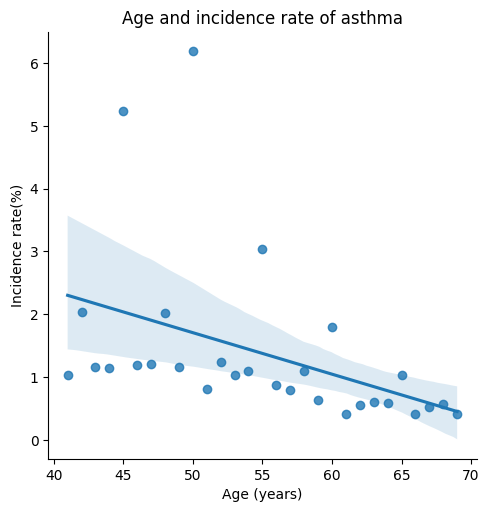

In [25]:
x = [i for i in range(41,70)]

y = []
for i in x:
    t = df[(df['Age at recruitment']==i) & (df['all_asthma_binary']==0)]
    to = df[(df['Age asthma diagnosed by doctor']==i) ]
    y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)

tempdf = pd.DataFrame()
tempdf["x"] = x
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel("Age (years)")
plt.ylabel("Incidence rate(%)")
plt.title("Age and incidence rate of asthma")
plt.show()

#### BMI

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


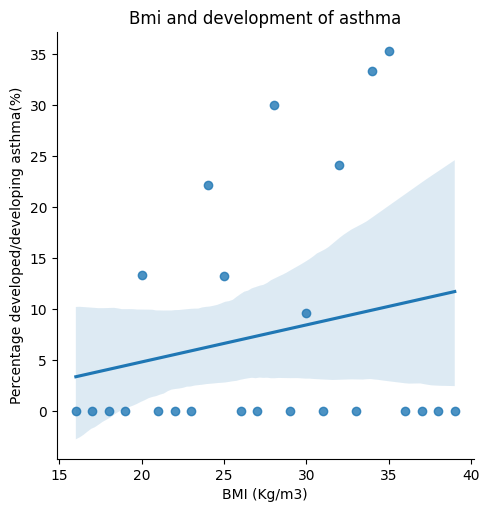

In [26]:
x = [i for i in range(16,40)]

y = []
for i in x:
    t = df[(df['Body mass index (BMI) | Instance 0']==i) & (df['all_asthma_binary']==0)]
    to = df[(df['Body mass index (BMI) | Instance 0']==i) & (df['all_asthma_binary']==1)]
    if to.shape[0] == 0:
        y.append(0)
    else:
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)

tempdf = pd.DataFrame()
tempdf["x"] = x
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel("BMI (Kg/m3)")
plt.ylabel("Percentage developed/developing asthma(%)")
plt.title("Bmi and development of asthma")
plt.show()

#### Height

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


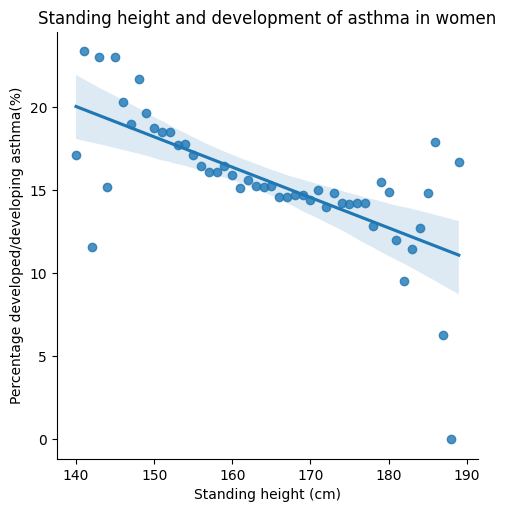

In [30]:
x = [i for i in range(140,190)]

y = []
for i in x:
    t = df[(df['Standing height | Instance 0']==i) & (df['all_asthma_binary']==0) & (df["Sex_binary"] ==0)]
    to = df[(df['Standing height | Instance 0']==i) & (df['all_asthma_binary']==1)& (df["Sex_binary"] ==0)]
    if to.shape[0] == 0:
        y.append(0)
    else:
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)

tempdf = pd.DataFrame()
tempdf["x"] = x
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel("Standing height (cm)")
plt.ylabel("Percentage developed/developing asthma(%)")
plt.title("Standing height and development of asthma in women")
plt.show()

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


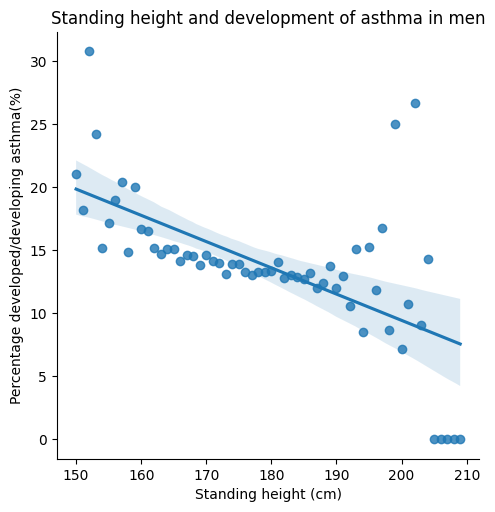

In [32]:
x = [i for i in range(150,210)]

y = []
for i in x:
    t = df[(df['Standing height | Instance 0']==i) & (df['all_asthma_binary']==0) & (df["Sex_binary"] ==1)]
    to = df[(df['Standing height | Instance 0']==i) & (df['all_asthma_binary']==1)& (df["Sex_binary"] ==1)]
    if to.shape[0] == 0:
        y.append(0)
    else:
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)

tempdf = pd.DataFrame()
tempdf["x"] = x
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel("Standing height (cm)")
plt.ylabel("Percentage developed/developing asthma(%)")
plt.title("Standing height and development of asthma in men")
plt.show()

#### Smoking

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


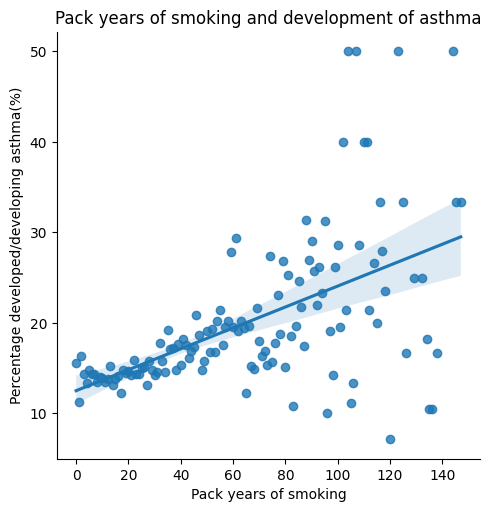

In [34]:
x = [i for i in range(0,150)]
xx=[]
y = []

for i in x:
    t = df[(df['Pack years of smoking']==i) & (df['all_asthma_binary']==0) ]
    to = df[(df['Pack years of smoking']==i) & (df['all_asthma_binary']==1)]
    
    if to.shape[0] == 0:
        y.remove(k/(k+h)*100)
        y.append(k/(k+h+t.shape[0])*100)
        h=h+t.shape[0]
        
    else:
        xx.append(i)
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)
        k = to.shape[0]
        h = t.shape[0]

tempdf = pd.DataFrame()
tempdf["x"] = xx
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel('Pack years of smoking')
plt.ylabel("Percentage developed/developing asthma(%)")
plt.title("Pack years of smoking and development of asthma")
plt.show()

### Binary variables

In [42]:
from statsmodels.stats.contingency_tables import mcnemar 
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

In [52]:
b=[
'Sex_binary',
'allergy',
'rhinitis',
'eczema',
'asbestosis',
'chronic_sinusitis',
'nasal_polyps',
'nasal_sinus_disorder',
'pneumonia',
'Hayfever_allergic_rhinitis_eczema_doctor',
'Brisk pace',
'Slow pace',
'Steady average pace',
'father_copd',
'mother_copd',
'Wheeze or whistling in the chest in last year | Instance 0_No',
'Wheeze or whistling in the chest in last year | Instance 0_Yes',
'hypertension',
 'hypothyroidism/myxoedema',
 'peritonitis',
 'duodenal ulcer',
 'heart attack/myocardial infarction',
 'diabetes',
 'high cholesterol',
 'gastro-oesophageal reflux (gord) / gastric reflux',
 'fracture lower leg / ankle',
 'disc problem',
 'angina',
 'cystitis',
 'anxiety/panic attacks',
 'dyspepsia / indigestion',
 'asthma',
 'osteoarthritis',
 'kidney stone/ureter stone/bladder stone',
 'cholelithiasis/gall stones',
 'chronic fatigue syndrome',
 'chronic sinusitis',
 'hayfever/allergic rhinitis',
 'gout',
 'enlarged prostate',
 'chickenpox',
 'tuberculosis (tb)',
 'psoriasis',
 'back pain',
 'muscle or soft tissue injuries',
 'fracture metatarsal',
 'iron deficiency anaemia',
 'pulmonary embolism +/- dvt',
 'hiatus hernia',
 'migraine',
 'headaches (not migraine)',
 'heart valve problem/heart murmur',
 'multiple sclerosis',
 'spinal cord disorder',
 'prostate problem (not cancer)',
 'unclassifiable',
 'allergy or anaphylactic reaction to drug',
 'eye trauma',
 'head injury',
 'fracture skull / head',
 'optic neuritis',
 'urinary frequency / incontinence',
 'spine arthritis/spondylitis',
 'uterine fibroids',
 'depression',
 'pancreatitis',
 'glaucoma',
 'retinal detachment',
 'stomach disorder',
 'sciatica',
 'other renal/kidney problem',
 'ulcerative colitis',
 'deep venous thrombosis (dvt)',
 'allergy/hypersensitivity/anaphylaxis',
 'osteomyelitis',
 'fracture fibula',
 'fracture tibia',
 'inguinal hernia',
 'type 2 diabetes',
 'psoriatic arthropathy',
 'ear/vestibular disorder',
 'irritable bowel syndrome',
 'colitis/not crohns or ulcerative colitis',
 'myasthenia gravis {1260_1284}',
 'gestational diabetes',
 'emphysema/chronic bronchitis',
 'diverticular disease/diverticulitis',
 'hyperthyroidism/thyrotoxicosis',
 'malabsorption/coeliac disease',
 'arthritis (nos)',
 'stroke',
 'ankylosing spondylitis',
 'iritis',
 'measles / morbillivirus',
 'scarlet fever / scarlatina',
 'plantar fascitis',
 'cervical spondylosis',
 'cataract',
 'allergy or anaphylactic reaction to food',
 'osteoporosis',
 'prolapsed disc/slipped disc',
 'endometriosis',
 'oesophagitis/barretts oesophagus',
 'pleurisy',
 'urinary tract infection/kidney infection',
 'sleep apnoea',
 'cellulitis',
 'breast cysts',
 'vaginal prolapse/uterine prolapse',
 'back problem',
 'essential hypertension',
 'muscle/soft tissue problem',
 'crohns disease',
 'uterine polyps',
 'anaemia',
 'thyroid problem (not cancer)',
 'ovarian cyst or cysts',
 'subarachnoid haemorrhage',
 'fracture toe',
 'lichen planus',
 'chronic obstructive airways disease/copd',
 'oesophageal disorder',
 'other joint disorder',
 'heart arrhythmia',
 'eczema/dermatitis',
 'svt / supraventricular tachycardia',
 'menorrhagia (unknown cause)',
 'infective/viral hepatitis',
 'diabetic eye disease',
 'gall bladder disease',
 "raynaud's phenomenon/disease",
 'rheumatoid arthritis',
 'menopausal symptoms / menopause',
 'epilepsy',
 'eye infection',
 'fracture rib',
 'macular degeneration',
 'nasal/sinus disorder',
 'renal failure requiring dialysis',
 'irregular heart beat',
 'tinnitus / tiniitis',
 'joint pain',
 'ectopic pregnancy',
 'meningitis',
 'other neurological problem',
 'hepatitis',
 'tonsiltis',
 'peripheral nerve injury',
 'jaundice (unknown cause)',
 'bone disorder',
 'gestational hypertension/pre-eclampsia',
 'pleural plaques (not known asbestosis)',
 'liver/biliary/pancreas problem',
 "meniere's disease",
 'appendicitis',
 'benign breast lump',
 'fracture clavicle / collar bone',
 'retinal problem',
 'schistosomiasis/bilharzia',
 'hereditary/genetic haematological disorder',
 'dry eyes',
 'miscarriage',
 'mania/bipolar disorder/manic depression',
 'pituitary adenoma/tumour',
 'nasal polyps',
 'atrial fibrillation',
 'polymyalgia rheumatica',
 'ureteric obstruction/hydronephrosis',
 'gastric/stomach ulcers',
 'bph / benign prostatic hypertrophy',
 'abnormal smear (cervix)',
 'undescended testicle',
 'bladder problem (not cancer)',
 'transient ischaemic attack (tia)',
 'thalassaemia',
 'fracture forearm / wrist',
 'osteopenia',
 'peripheral neuropathy',
 'hepatitis a',
 'pneumothorax',
 'fracture sternum',
 'rosacea',
 'scleroderma/systemic sclerosis',
 'venous thromboembolic disease',
 'peripheral vascular disease',
 'trapped nerve/compressed nerve',
 'shingles',
 'umbilical hernia',
 'heart/cardiac problem',
 'other respiratory problems',
 'burns',
 'peripheral nerve disorder',
 'rectal or colon adenoma/polyps',
 'erectile dysfunction / impotence',
 'mumps / epidemic parotitis',
 'whooping cough / pertussis',
 'psychological/psychiatric problem',
 'cardiomyopathy',
 'neck problem/injury',
 'helicobacter pylori',
 'spinal injury',
 'cerebral aneurysm',
 'blistering/desquamating skin disorder',
 'spontaneous pneumothorax/recurrent pneumothorax',
 'blepharitis / eyelid infection',
 'eye/eyelid problem',
 'giant cell/temporal arteritis',
 'parkinsons disease',
 'other abdominal problem',
 'connective tissue disorder',
 'deliberate self-harm/suicide attempt',
 'infectious mononucleosis / glandular fever / epstein barr virus (ebv)',
 'fracture upper arm / humerus / elbow',
 'vasculitis',
 'acromegaly',
 'anorexia/bulimia/other eating disorder',
 'joint disorder',
 'female infertility',
 "dupuytren's contracture",
 'hyperparathyroidism',
 'stress',
 'retinal artery/vein occlusion',
 'sarcoidosis',
 'disc degeneration',
 'fracture foot',
 'otosclerosis',
 'gastrointestinal bleeding',
 'polycystic kidney',
 'alcohol dependency',
 'non-infective hepatitis',
 'allergy to house dust mite',
 'benign neuroma',
 'post-natal depression',
 'low platelets/platelet disorder',
 'varicose veins',
 'gynaecological disorder (not cancer)',
 'fracture wrist / colles fracture',
 'nervous breakdown',
 'myasthenia gravis {1437_1489}',
 'bursitis',
 'fracture jaw',
 'polycystic ovaries/polycystic ovarian syndrome',
 'fracture finger',
 'polycythaemia vera',
 'fracture patella / knee',
 'carpal tunnel syndrome',
 'femoral hernia',
 'polio / poliomyelitis',
 'testicular problems (not cancer)',
 'scrotal problem (not cancer)',
 'peptic ulcer',
 'acne/acne vulgaris',
 'fracture nose',
 'fibromyalgia',
 'rheumatic fever',
 'chronic skin ulcers',
 'fracture neck of femur / hip',
 'type 1 diabetes',
 'urticaria',
 'soft tissue inflammation',
 'fracture neck / cervical fracture',
 'constipation',
 'septicaemia / sepsis',
 'anal problem',
 'gastritis/gastric erosions',
 'herpes simplex',
 'systemic lupus erythematosis/sle',
 'liver failure/cirrhosis',
 'other substance abuse/dependency',
 'renal failure not requiring dialysis',
 'schizophrenia',
 'tennis elbow / lateral epicondylitis',
 'heart failure/pulmonary odema',
 'subdural haemorrhage/haematoma',
 'haemorrhoids / piles',
 'cerebral palsy',
 'dysmenorrhoea / dysmenorrhea',
 'rectal prolapse',
 'rubella / german measles',
 'cervical polyps',
 'anal fissure',
 'dermatopolymyositis',
 "bell's palsy/facial nerve palsy",
 'malaria',
 'breast fibroadenoma',
 'neurological injury/trauma',
 'fracture pelvis',
 'food intolerance',
 'prostatitis',
 'bowel / intestinal perforation',
 'leg claudication/ intermittent claudication',
 'ovarian problem',
 'essential thrombocytosis',
 'myelofibrosis',
 "adrenocortical insufficiency/addison's disease",
 "grave's disease",
 'meningioma / benign meningeal tumour',
 'trigemminal neuralgia',
 'inflammatory bowel disease',
 'thyroid goitre',
 'pernicious anaemia',
 'insomnia',
 'scoliosis',
 'brain haemorrhage',
 'varicose ulcer',
 'disorder or pituitary gland',
 'throat or larynx disorder',
 'vocal cord polyp',
 'cholecystitis',
 'tendonitis / tendinitis / tenosynovitis',
 'cervical intra-epithelial neoplasia (cin) / precancerous cells cervix',
 'phaeochromocytoma',
 'thyroid radioablation therapy',
 'post-traumatic stress disorder',
 'myositis/myopathy',
 'pemphigoid/pemphigus',
 'fracture radius',
 'fracture ulna',
 'allergy to elastoplast',
 'incisional hernia',
 'pulmonary fibrosis',
 'uterine problem',
 'haemophilia',
 'gastroenteritis/dysentry',
 'fibrosing alveolitis/unspecified alveolitis',
 'fibrocystic disease',
 'spinal stenosis',
 'paraplegia',
 'fracture hand',
 'fracture face / orbit / eye socket',
 'cranial nerve problem/palsy',
 'hiv/aids',
 'nephritis',
 'thyroiditis',
 'clotting disorder/excessive bleeding',
 'fracture thumb',
 'bowel / intestinal obstruction',
 'aortic aneurysm',
 'oesophageal stricture',
 'aplastic anaemia',
 'breast disease (not cancer)',
 'abdominal hernia',
 'pleural effusion',
 'lymphoedema',
 'renal/kidney failure',
 'bowel / intestinal infarction',
 'brain abscess/intracranial abscess',
 'fracture shoulder / scapula',
 'vertigo',
 'labyrinthitis',
 'fracture shaft of femur',
 'dementia/alzheimers/cognitive impairment',
 'empyema',
 'polyartertis nodosa',
 'alcoholic liver disease / alcoholic cirrhosis',
 'fracture vertebra / crush fracture / vertebral collapse',
 "bowen's disease",
 'vitiligo',
 'pericardial problem',
 'other demyelinating disease (not multiple sclerosis)',
 'opioid dependency',
 'pyelonephritis',
 'chronic/degenerative neurological problem',
 "sjogren's syndrome/sicca syndrome",
 'pericarditis',
 'respiratory infection',
 'neutropenia/lymphopenia',
 'alopecia / hair loss',
 'spinal abscess',
 'acute infective polyneuritis/guillain-barre syndrome',
 'encephalitis',
 'hepatitis c',
 'aortic aneurysm rupture',
 'sickle cell disease',
 'parathyroid gland problem (not cancer)',
 'aortic regurgitation / incompetence',
 'benign / essential tremor',
 'hypopituitarism',
 'hypertrophic cardiomyopathy (hcm / hocm)',
 'stevens johnson syndrome',
 'pelvic inflammatory disease/ pid',
 'pyloric stenosis',
 'aortic stenosis',
 'myocarditis',
 'haemochromatosis',
 'arterial embolism',
 'polymyositis',
 "housemaid's knee (prepatellar bursitis)",
 'wegners granulmatosis',
 'mitral stenosis',
 'myeloproliferative disorder',
 'lichen sclerosis',
 'primary biliary cirrhosis',
 'yellow fever',
 'typhoid fever',
 'other venous/lymphatic disease',
 'bile duct obstruction/ascending cholangitis',
 'atrial flutter',
 'interstitial lung disease',
 "paget's disease",
 'pancreatic disease',
 'aortic valve disease',
 'mitral valve disease',
 'diphtheria',
 'allergy to nickel',
 'hepatitis b',
 'mitral valve prolapse',
 'lung abscess',
 'diabetic neuropathy/ulcers',
 'contact dermatitis',
 'disorder of adrenal gland',
 'dengue fever',
 'parathyroid hyperplasia/adenoma',
 'chronic laryngitis',
 'kidney nephropathy',
 'varicella zoster virus',
 'obsessive compulsive disorder (ocd)',
 'spina bifida',
 'mitral regurgitation / incompetence',
 'adrenal tumour',
 'infection of nervous system',
 'mrsa / methicillin resistant staphylococcus aureus',
 'ischaemic stroke',
 'cushings syndrome',
 'hydatiform mole',
 'wolff parkinson white / wpw syndrome',
 'sclerosing cholangitis',
 'cervical problem',
 'oesophageal varicies',
 "hyperaldosteronism/conn's syndrome",
 'monoclonal gammopathy/not myeloma',
 'motor neurone disease',
 'iga nephropathy',
 'hyperprolactinaemia',
 'male infertility',
 'glomerulnephritis',
 'alpha-1 antitrypsin deficiency',
 'cervical erosion',
 'carcinoid syndrome/tumour',
 'sick sinus syndrome',
 'pericardial effusion',
 'giardia / giardiasis',
 'retinitis pigmentosa',
 'diabetes insipidus',
 'respiratory failure',
 'dermatomyositis',
 'antiphospholipid syndrome',
 'bile duct disease',
 'aortic dissection',
 'epicondylitis',
 'diabetic nephropathy',
 'pancytopenia',
 'chlamydia',
 'benign insulinoma',
 'synovitis',
 'microscopic polyarteritis',
 'hepatitis e'
]

In [85]:
df['Doctor diagnosed asthma'] =df['Doctor diagnosed asthma'].apply(ap.yes_no_binairy)

In [96]:
def binary_sign(i):
    no_nd = df[(df['all_asthma_binary']==0) & (df[i] == 0) & (df['Doctor diagnosed asthma'] ==0)& (df['asthma'] ==0)]
    po_nd = df[(df['all_asthma_binary']==1) & (df[i] == 0)]
    
    no_pd = df[(df['all_asthma_binary']==0) & (df[i] == 1) & (df['Doctor diagnosed asthma'] ==0)& (df['asthma'] ==0)]
    po_pd = df[(df['all_asthma_binary']==1) & (df[i] == 1) ]

    data=[[ no_nd.shape[0],no_pd.shape[0] ],
          [po_nd.shape[0], po_pd.shape[0]] ]

    if no_nd.shape[0] !=0 and no_pd.shape[0]!=0 and po_nd.shape[0] !=0 and  po_pd.shape[0] !=0:
        res1 = fisher_exact(data, alternative='two-sided')
        
        res2 = chi2_contingency(data)
        if res1.pvalue < 0.05 or res2.pvalue < 0.05:
            print(i)
            print(data)
            print(mcnemar(data, exact=False))
            print("fisher: ", res1.pvalue)
            print("chi2: ", res2.pvalue)
            print("\n")

In [97]:
for i in b:
    binary_sign(i)

Sex_binary
[[228511, 196311], [42678, 31394]]
pvalue      0.0
statistic   98760.99495792693
fisher:  2.9345436485328977e-83
chi2:  6.195606208146429e-83


allergy
[[419942, 4657], [72611, 1431]]
pvalue      0.0
statistic   59760.96455194906
fisher:  1.1157016138550932e-71
chi2:  2.8387143808926365e-81


rhinitis
[[412164, 12437], [69175, 4867]]
pvalue      0.0
statistic   39443.797100916534
fisher:  0.0
chi2:  0.0


eczema
[[418894, 5703], [71674, 2370]]
pvalue      0.0
statistic   56244.632125825505
fisher:  4.0040303429006e-246
chi2:  9.285206365996439e-299


asbestosis
[[424621, 201], [74012, 60]]
pvalue      0.0
statistic   73409.18841712369
fisher:  0.000460829307191077
chi2:  0.0003027328572555585


chronic_sinusitis
[[423066, 1531], [73702, 340]]
pvalue      0.0
statistic   69231.70550157511
fisher:  7.972038957833884e-05
chi2:  5.878007097934645e-05


nasal_polyps
[[423777, 819], [73556, 486]]
pvalue      0.0
statistic   71133.11860168068
fisher:  4.813236323360293e-88
chi2:  1

In [98]:
def binary_sign(i):
    no_nd = df[(df['all_asthma_binary']==0) & (df[i] == 0) & (df['Doctor diagnosed asthma'] ==0)& (df['asthma'] ==0)]
    po_nd = df[(df['all_asthma_binary']==1) & (df[i] == 0)& (df['binary_assesment'] == 1)]
    
    no_pd = df[(df['all_asthma_binary']==0) & (df[i] == 1) & (df['Doctor diagnosed asthma'] ==0)& (df['asthma'] ==0)]
    po_pd = df[(df['all_asthma_binary']==1) & (df[i] == 1) & (df['binary_assesment'] == 1)]

    data=[[ no_nd.shape[0],no_pd.shape[0] ],
          [po_nd.shape[0], po_pd.shape[0]] ]
    if no_nd.shape[0] !=0 and no_pd.shape[0]!=0 and po_nd.shape[0] !=0 and  po_pd.shape[0] !=0:
        res1 = fisher_exact(data, alternative='two-sided')
        
        res2 = chi2_contingency(data)
        if res1.pvalue < 0.05 or res2.pvalue < 0.05:
            print(i)
            print(data)
            print(mcnemar(data, exact=False))
            print("fisher: ", res1.pvalue)
            print("chi2: ", res2.pvalue)
            print("\n")

In [99]:
for i in b:
    binary_sign(i)

Sex_binary
[[228511, 196311], [8721, 6200]]
pvalue      0.0
statistic   171629.95493874126
fisher:  2.448424040806485e-29
chi2:  3.577106903333849e-29


allergy
[[419942, 4657], [14689, 223]]
pvalue      0.0
statistic   5201.124832006616
fisher:  1.4054026944491144e-05
chi2:  5.998921040913984e-06


rhinitis
[[412164, 12437], [14162, 750]]
pvalue      4.0735112199594946e-26
statistic   111.74014060678972
fisher:  7.86186443955918e-42
chi2:  2.936090682721963e-49


eczema
[[418894, 5703], [14651, 261]]
pvalue      0.0
statistic   3932.829370148374
fisher:  4.629071166609065e-05
chi2:  2.8209944107378946e-05


asbestosis
[[424621, 201], [14906, 15]]
pvalue      0.0
statistic   14311.750579201695
fisher:  0.007955319767982152
chi2:  0.0070271991898780825


chronic_sinusitis
[[423066, 1531], [14829, 83]]
pvalue      0.0
statistic   10807.46998777506
fisher:  0.00024831913595271
chi2:  0.00013304592413461897


nasal_polyps
[[423777, 819], [14827, 85]]
pvalue      0.0
statistic   12539.69378

#### women only and 100 incidence cutoff

In [119]:
l = []

In [120]:
def binary_sign(i):
    no_nd = df[(df['all_asthma_binary']==0) & (df[i] == 0)& (df['Sex_binary'] == 0) & (df['Doctor diagnosed asthma'] ==0) & (df['asthma'] ==0)]
    po_nd = df[(df['all_asthma_binary']==1) & (df[i] == 0)& (df['binary_assesment'] == 1)& (df['Sex_binary'] == 0)]
    
    no_pd = df[(df['all_asthma_binary']==0) & (df[i] == 1)& (df['Sex_binary'] == 0) & (df['Doctor diagnosed asthma'] ==0)& (df['asthma'] ==0)]
    po_pd = df[(df['all_asthma_binary']==1) & (df[i] == 1) & (df['binary_assesment'] == 1)& (df['Sex_binary'] == 0)]

    data=[[ no_nd.shape[0],no_pd.shape[0] ],
          [po_nd.shape[0], po_pd.shape[0]] ]
    if no_nd.shape[0] !=0 and no_pd.shape[0]>100 and po_nd.shape[0] !=0 and  po_pd.shape[0] >100:
        res1 = fisher_exact(data, alternative='two-sided')
        
        res2 = chi2_contingency(data)
        if res1.pvalue < 0.05 or res2.pvalue < 0.05:
            print(i)
            print(data)
            print(mcnemar(data, exact=False))
            print("fisher: ", res1.pvalue)
            print("chi2: ", res2.pvalue)
            print("\n")
            if i not in l:
                l.append(i)

In [121]:
for i in b:
    binary_sign(i)

allergy
[[225226, 3062], [8556, 156]]
pvalue      0.0
statistic   2597.0949388879326
fisher:  0.0006668475897786024
chi2:  0.0004487594013095837


rhinitis
[[222216, 6074], [8295, 417]]
pvalue      1.4258155356934827e-76
statistic   342.98837775767277
fisher:  1.7374372165065697e-27
chi2:  1.205600410964592e-32


pneumonia
[[226091, 2420], [8550, 171]]
pvalue      0.0
statistic   3424.3063810391977
fisher:  5.743962996244066e-13
chi2:  2.8001560199051348e-15


Hayfever_allergic_rhinitis_eczema_doctor
[[181668, 46843], [5908, 2813]]
pvalue      0.0
statistic   31764.181835415442
fisher:  1.6141154608463803e-139
chi2:  2.001922540898335e-154


Brisk pace
[[138584, 89927], [6131, 2590]]
pvalue      0.0
statistic   73097.52467259364
fisher:  4.642957099599359e-76
chi2:  1.7867086815199486e-73


Slow pace
[[212100, 16411], [7415, 1306]]
pvalue      0.0
statistic   3395.871107193822
fisher:  2.4233033585878694e-130
chi2:  2.387378125162958e-162


Steady average pace
[[108192, 120319], [4035,

#### Men only 100 cutoff

In [122]:
def binary_sign(i):
    no_nd = df[(df['all_asthma_binary']==0) & (df[i] == 0)& (df['Sex_binary'] == 1) & (df['Doctor diagnosed asthma'] ==0)& (df['asthma'] ==0)]
    po_nd = df[(df['all_asthma_binary']==1) & (df[i] == 0)& (df['binary_assesment'] == 1)& (df['Sex_binary'] == 1)]
    
    no_pd = df[(df['all_asthma_binary']==0) & (df[i] == 1)& (df['Sex_binary'] == 1) & (df['Doctor diagnosed asthma'] ==0)& (df['asthma'] ==0)]
    po_pd = df[(df['all_asthma_binary']==1) & (df[i] == 1) & (df['binary_assesment'] == 1)& (df['Sex_binary'] == 1)]

    data=[[ no_nd.shape[0],no_pd.shape[0] ],
          [po_nd.shape[0], po_pd.shape[0]] ]
    if no_nd.shape[0] !=0 and no_pd.shape[0]>100 and po_nd.shape[0] !=0 and  po_pd.shape[0] >100:
        res1 = fisher_exact(data, alternative='two-sided')
        
        res2 = chi2_contingency(data)
        if res1.pvalue < 0.05 or res2.pvalue < 0.05:
            print(i)
            print(data)
            print(mcnemar(data, exact=False))
            print("fisher: ", res1.pvalue)
            print("chi2: ", res2.pvalue)
            print("\n")
            if i not in l:
                l.append(i)

In [123]:
for i in b:
    binary_sign(i)

rhinitis
[[189948, 6363], [5867, 333]]
pvalue      7.604754008852464e-06
statistic   20.034750613246118
fisher:  1.488573720746985e-17
chi2:  3.6587158318763317e-20


eczema
[[193688, 2623], [6076, 124]]
pvalue      7.493201534329855e-300
statistic   1369.8475686860559
fisher:  2.7151440882104172e-05
chi2:  1.1159123556828329e-05


pneumonia
[[193629, 2682], [6069, 131]]
pvalue      7.089833739674651e-287
statistic   1310.1355273683007
fisher:  3.4004082074480583e-06
chi2:  1.0029262761600284e-06


Hayfever_allergic_rhinitis_eczema_doctor
[[162563, 33748], [4556, 1644]]
pvalue      0.0
statistic   22246.096517335005
fisher:  1.400067511888413e-72
chi2:  1.1849083788650837e-80


Brisk pace
[[119007, 77304], [4282, 1918]]
pvalue      0.0
statistic   65355.164378692425
fisher:  3.742010014128343e-42
chi2:  6.138733453577882e-41


Slow pace
[[181855, 14456], [5315, 885]]
pvalue      0.0
statistic   4225.360376308735
fisher:  1.1105156530700043e-74
chi2:  6.260542092471094e-91


father_copd

### Clustering on causation

In [124]:
len(l)

51

In [125]:
datacolumns_selected =[
     'Body mass index (BMI) | Instance 0',
    'Pack years of smoking',
    'Sex_binary',
    'Age at recruitment',
    'Standing height | Instance 0',
]

In [110]:
#visualization function
def boxplot_timseries(data, title, abline=False):
    fig = plt.figure()
     
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(title)
    
    # Creating plot
    bp = ax.boxplot(data)
    #plt.xticks([1, 2], ['df1', 'df2'])
    if abline != False:
        plt.axvline(x = abline, color = 'b')
    
    plt.show()

Number of missing values: 
 Body mass index (BMI) | Instance 0                                  277
Pack years of smoking                                             20113
Sex_binary                                                            0
Age at recruitment                                                    0
Standing height | Instance 0                                        243
allergy                                                              20
rhinitis                                                             20
pneumonia                                                             0
Hayfever_allergic_rhinitis_eczema_doctor                              0
Brisk pace                                                            0
Slow pace                                                             0
Steady average pace                                                   0
father_copd                                                           0
mother_copd                         

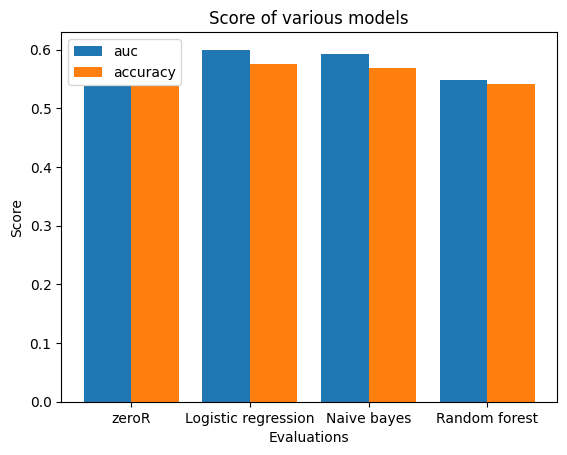

F1:  0.6426217864013649 0.6096620134451358 0.5863656635602822
auc:  [0.5383497664763882, 0.6000035601059563, 0.5933408010929656, 0.5483493227129845]
accuracy:  [0.5383497664763882, 0.5758173326414114, 0.568344577062792, 0.5419823559937726]


In [126]:
no_pd = df[(df['all_asthma_binary']==0) & (df['Doctor diagnosed asthma'] ==0)& (df['asthma'] ==0)]
po_pd = df[(df['all_asthma_binary']==1)  & (df['binary_assesment'] == 1)]


cohort = pd.concat([po_pd,
                    no_pd.sample(
                    po_pd.shape[0]
                    )])

emp.pipeline(cohort[datacolumns_selected+l+["all_asthma_binary"]], "all_asthma_binary", datacolumns_selected,0.25, splits=5)

Build a percentage basaed model just like osteoporosis based on on significant and trend showing variables

In [78]:
df.columns.tolist()

['Participant ID',
 'Date J45 first reported (asthma)',
 'Date J46 first reported (status asthmaticus)',
 'all_asthma',
 'all_asthma_binary',
 'Date of attending assessment centre | Instance 0',
 'Date of attending assessment centre | Instance 1',
 'Date of attending assessment centre | Instance 2',
 'Date of attending assessment centre | Instance 3',
 'Year of birth',
 'binary_assesment',
 'age_asthma',
 'Age at recruitment',
 'Sex_binary',
 'Eosinophill count | Instance 0_x',
 'Eosinophill count | Instance 1_x',
 'Eosinophill count | Instance 2_x',
 'Eosinophill percentage | Instance 0_x',
 'Eosinophill percentage | Instance 1_x',
 'Eosinophill percentage | Instance 2_x',
 'White blood cell (leukocyte) count | Instance 0_x',
 'White blood cell (leukocyte) count | Instance 1_x',
 'White blood cell (leukocyte) count | Instance 2_x',
 'Neutrophill count | Instance 0_x',
 'Neutrophill count | Instance 1_x',
 'Neutrophill count | Instance 2_x',
 'Neutrophill percentage | Instance 0_x',
 '

In [83]:
for i in df.columns.tolist():
    if re.search("asth", str(i)):
            print(i)

Date J45 first reported (asthma)
Date J46 first reported (status asthmaticus)
all_asthma
all_asthma_binary
age_asthma
Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0
Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 1
Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 2
Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 3
Doctor diagnosed asthma
Age asthma diagnosed by doctor
Recent medication for asthma
asthma
myasthenia gravis {1260_1284}
myasthenia gravis {1437_1489}


In [84]:
df['Doctor diagnosed asthma'].value_counts()

No     105758
Yes     15484
Name: Doctor diagnosed asthma, dtype: int64